# 2. ML for Regression hw02

In [1]:
import numpy as np
import pandas as pd

 ## 2.2 Data Preparation

In [2]:
#data = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [3]:
df = pd.read_csv('laptops.csv')

In [4]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_') #format the column headings

In [6]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [7]:
df.dtypes

laptop           object
status           object
brand            object
model            object
cpu              object
ram               int64
storage           int64
storage_type     object
gpu              object
screen          float64
touch            object
final_price     float64
dtype: object

In [8]:
# Considering numerical columns only
columns = [
    "ram",
    "storage",
    "screen",
    "final_price"
]

df = df[columns]

## 2.3 Exploratory Data Analysis

**Distribution of prices**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

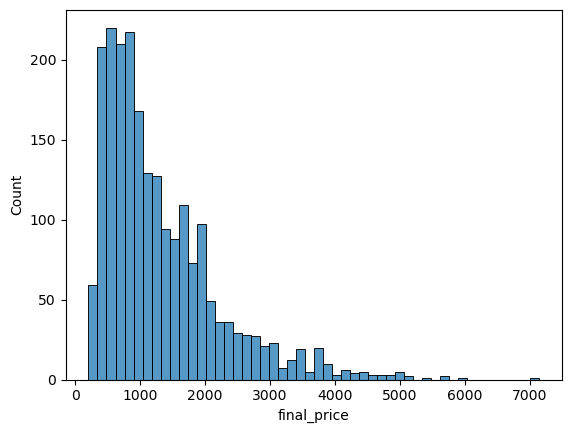

In [10]:
sns.histplot(df.final_price, bins=50) #long tail distribution

<Axes: xlabel='final_price', ylabel='Count'>

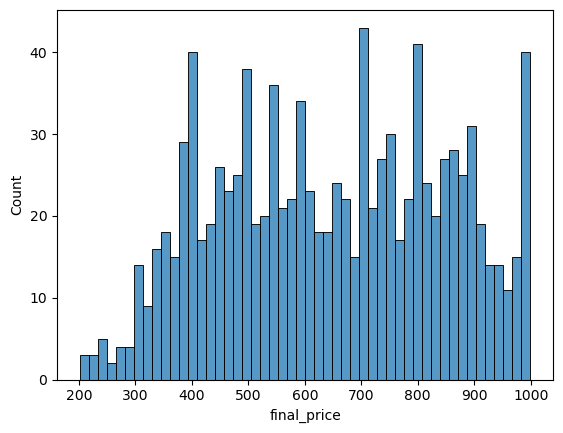

In [11]:
sns.histplot(df.final_price[df.final_price < 1000], bins=50)

In [12]:
price_logs = np.log1p(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

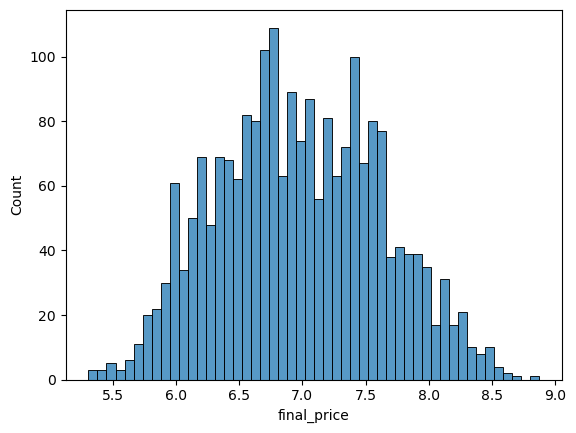

In [13]:
sns.histplot(price_logs, bins=50) # Normal distribution

**Question 1:** There's one column with missing values. What is it?

In [14]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

 Answer: `screen`

**Question 2:** What's the median (50% percentile) for variable `'ram'`?

In [15]:
df['ram'].median()

16.0

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed `42`.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [16]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [17]:
n_val, n_test, n_train

(432, 432, 1296)

In [18]:
idx = np.arange(n) # Generate a sequence of numbers from 0 to n
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [19]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [20]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
#Transform the price column ('final_price')
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

**Question 3:** Filling NAs
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

**Options:**

- With 0
- With mean
- Both are equally good

In [23]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + w[j] * xi[j]
        
    return res

In [24]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    weight = XTX_inv.dot(X.T).dot(y)
    
    return weight[0], weight[1:]

In [25]:
def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

In [26]:
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error**2).mean()
    return np.sqrt(mse)

Using _Zero_

In [27]:
X_train = prepare_X(df_train, fillna_value=0)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w_0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

597.36

Using _Mean_

In [28]:
mean = df_train['screen'].mean()

X_train = prepare_X(df_train, fillna_value=mean)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w_0 + X_val.dot(w)

round(rmse(y_val, y_pred), 2)

600.27

Answer: **With 0**

**Question 4:** Regularization
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

**Options:**

- 0
- 0.01
- 1
- 10
- 100

In [29]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    weight = XTX_inv.dot(X.T).dot(y)
    
    return weight[0], weight[1:]

In [30]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)
    
    rmse_val = rmse(y_val, y_pred)
    print('%06s, %0.2f' % (r, rmse_val))

     0, 597.36
  0.01, 597.36
   0.1, 597.35
     1, 597.21
     5, 597.01
    10, 597.06
   100, 597.90


Answer: `r = 10`

**Question 5:** RMSE spread
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits (`round(std, 3)`)

**What's the value of std?**

- 19.176
- 29.176
- 39.176
- 49.176

> **Note:** Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's  high, the values are different. If standard deviation of scores is low, then our model is *stable*.

In [31]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_test + n_val)
    
    idx = np.arange(n) # Generate a sequence of numbers from 0 to n
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    y_test = df_test['final_price'].values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = prepare_X(df_train, fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)
    
    rmses.append(result)

0 565.4520868770968
1 636.7985423056709
2 588.9558697907987
3 597.8148920012554
4 571.9627915111051
5 573.2383256618954
6 647.3438328407344
7 550.4398184485837
8 587.3335036169901
9 576.1017929433068


In [32]:
round(np.std(rmses), 3)

29.176

**Question 6:**
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

**Options:**

- 598.60
- 608.60
- 618.60
- 628.60

In [33]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_test + n_val)
    
idx = np.arange(n) # Generate a sequence of numbers from 0 to n
np.random.seed(9)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [35]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train, fillna_value=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(result)

608.6099822049604
